926.0
1852.0
2778.0
3704.0
4630.0
5556.0
6482.0
7408.0
8334.0
9260.0
10186.0
11112.0
12038.0


c:\Users\19234\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


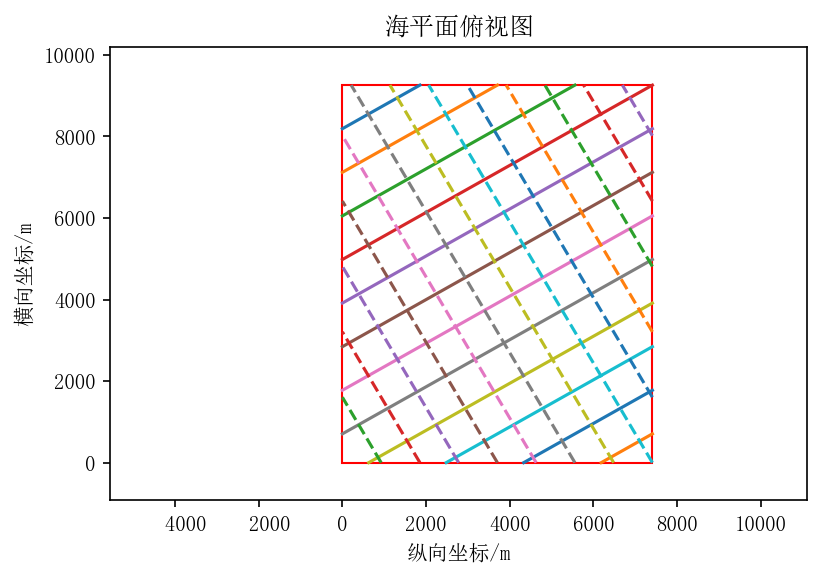

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 定义两个点的坐标
x = [1, 4]  # x坐标
y = [2, 6]  # y坐标
NM=1852

# 绘制两点之间的线
# plt.Rectangle()
rectangle = plt.Rectangle((0, 0), 4*NM, 5*NM, edgecolor='r', facecolor='none')

# 创建一个图形并添加矩形
fig, ax = plt.subplots()
fig.dpi=150
ax.set_xlim(-3*NM, 6*NM)
ax.set_ylim(-0.5*NM, 5.5*NM)
ax.add_patch(rectangle)
import pandas as pd

plt.ion()
# 设置标题和坐标轴标签
plt.rc("font",family='SimSun')
plt.title('海平面俯视图')
plt.xlabel('纵向坐标/m')
plt.ylabel('横向坐标/m')
NM=1852
beta=30
beta=np.radians(beta)
width=4*NM
height=5*NM
d=0.5*NM

x1=-height/(np.tan(beta))
dx=d/np.sin(beta) #x轴间距
# ax.plot([x1,0],[0,height])

def get_start_end_points(xi,beta):
    ans=[]
    if(xi>0 and xi<=width):#下边交点
        ans.append(np.array([xi,0]))
    y=-np.tan(beta)*xi
    if(y>0 and y<height):#左边交点
        ans.append(np.array([0,y]))
    y=np.tan(beta)*(width-xi)
    if(y>0 and y<=height):#右边
        ans.append(np.array([width,y]))
    x=xi+(height/np.tan(beta))
    if(x>0 and x<width):#下边交点
        ans.append(np.array([x,height]))
    return ans

cur_x=x1+dx
point_list1=[]
while(cur_x<width):
    cur_ans=get_start_end_points(cur_x,beta)
    point_list1.append(cur_ans)
    if(len(cur_ans)==2):
        p1=np.array(cur_ans)[:,0]
        p2=np.array(cur_ans)[:,1]
        ax.plot(p1,p2)
    cur_x+=dx
dx=0.5*NM
cur_x=dx
ans=get_start_end_points(cur_x,beta+np.pi/2)
point_list=[]

while(len(ans)!=0):
    point_list.append(ans)
    print(cur_x)
    cur_x+=dx   
    if(len(ans)==2):
        p1=np.array(ans)[:,0]
        p2=np.array(ans)[:,1]
        ax.plot(p1,p2,linestyle='--')
    ans=get_start_end_points(cur_x,beta+np.pi/2)
plt.show()


In [2]:
point_list1

[[array([   0.        , 7950.43824124]),
  array([1309.56175876, 9260.        ])],
 [array([   0.        , 6640.87648249]),
  array([2619.12351751, 9260.        ])],
 [array([   0.        , 5331.31472373]),
  array([3928.68527627, 9260.        ])],
 [array([   0.        , 4021.75296497]),
  array([5238.24703503, 9260.        ])],
 [array([   0.        , 2712.19120621]),
  array([6547.80879379, 9260.        ])],
 [array([   0.        , 1402.62944746]),
  array([7408.        , 8810.62944746])],
 [array([ 0.       , 93.0676887]), array([7408.       , 7501.0676887])],
 [array([1216.49407006,    0.        ]),
  array([7408.        , 6191.50592994])],
 [array([2526.05582882,    0.        ]),
  array([7408.        , 4881.94417118])],
 [array([3835.61758757,    0.        ]),
  array([7408.        , 3572.38241243])],
 [array([5145.17934633,    0.        ]),
  array([7408.        , 2262.82065367])],
 [array([6454.74110509,    0.        ]),
  array([7408.        ,  953.25889491])]]

In [3]:
df=pd.read_csv("data/data.csv")
df

,Unnamed: 0,0.0,0.020000000000000018,0.03999999999999998,0.06,0.08000000000000002,0.09999999999999998,0.12,0.14,0.16000000000000003,...,3.82,3.84,3.86,3.88,3.9,3.92,3.94,3.96,3.98,4.0
0,0.00,24.40,24.12,23.85,23.59,23.34,23.10,22.88,22.67,22.46,...,179.52,181.44,183.37,185.31,187.26,189.23,191.20,193.19,195.19,197.20
1,0.02,24.32,24.04,23.77,23.51,23.27,23.03,22.81,22.60,22.39,...,178.75,180.66,182.58,184.52,186.46,188.42,190.38,192.36,194.35,196.35
2,0.04,24.25,23.97,23.70,23.44,23.19,22.96,22.74,22.53,22.33,...,177.99,179.89,181.80,183.73,185.66,187.61,189.57,191.54,193.52,195.51
3,0.06,24.17,23.89,23.63,23.37,23.13,22.89,22.67,22.46,22.26,...,177.23,179.12,181.02,182.94,184.86,186.80,188.75,190.71,192.68,194.67
4,0.08,24.10,23.82,23.56,23.30,23.06,22.83,22.61,22.40,22.20,...,176.47,178.35,180.24,182.15,184.07,186.00,187.94,189.89,191.85,193.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,4.92,82.18,82.21,82.23,82.26,82.28,82.30,82.32,82.34,82.36,...,67.70,67.52,67.34,67.16,66.98,66.80,66.61,66.43,66.24,66.05
247,4.94,82.73,82.76,82.79,82.81,82.84,82.86,82.88,82.90,82.92,...,67.56,67.38,67.19,67.00,66.81,66.61,66.42,66.23,66.03,65.84
248,4.96,83.29,83.31,83.34,83.37,83.39,83.42,83.44,83.46,83.48,...,67.43,67.23,67.03,66.84,66.64,66.44,66.23,66.03,65.83,65.62
249,4.98,83.84,83.87,83.90,83.93,83.95,83.98,84.00,84.03,84.05,...,67.29,67.09,66.88,66.68,66.47,66.26,66.05,65.84,65.62,65.41


In [16]:
data=df.iloc[:,1:].values
data = df.iloc[:, 1:].values
mean = np.mean(data)
median = np.median(data)
std = np.std(data)
min_value = np.min(data)
max_value = np.max(data)
percentile_25 = np.percentile(data, 25)
percentile_50 = np.percentile(data, 50)
percentile_75 = np.percentile(data, 75)

# 打印统计指标
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std)
print("Minimum:", min_value)
print("Maximum:", max_value)
print("25th Percentile:", percentile_25)
print("50th Percentile (Median):", percentile_50)
print("75th Percentile:", percentile_75)

Mean: 62.53868466432777
Median: 61.86
Standard Deviation: 29.78762856519687
Minimum: 20.0
Maximum: 197.2
25th Percentile: 39.93
50th Percentile (Median): 61.86
75th Percentile: 75.41


In [5]:
x=df.columns[1:].astype(float).values
y=df.iloc[:,0].values
Z=[]
for index, row in df.iloc[:, 1:].iterrows():
    for column, value in row.iteritems():
        Z.append([NM*float(column),NM*df.iloc[index, 0],-value])
Z[3]

[111.11999999999999, 0.0, -23.59]

In [6]:
df['3.0'][150]

70.0

In [7]:
Z[1000]

[7259.84, 148.16, -186.0]

In [8]:
import numpy as np
from scipy.spatial import cKDTree
points = np.array(Z)  # 曲面上的离散点
kdtree = cKDTree(points)
# 离散点数据
def get_intersect_point(line_point,line_direction):
    # 构建离散点数据的KD树，用于快速查找最近点
    # 定义迭代参数
    max_iterations = 300  # 最大迭代次数
    distance_threshold = 1e-6  # 距离阈值，用于判断迭代终止条件
    t = 0  # 直线参数初始值
    # 迭代计算交点
    min_distance=np.Inf
    for i in range(max_iterations):
        # 根据当前直线参数 t 计算直线上的点
        line_point_current = line_point + i * line_direction
        # 在离散点数据中查找最近点
        _, nearest_point_index = kdtree.query(line_point_current)

        # 获取最近点的坐标
        nearest_point = points[nearest_point_index]
        # 计算当前直线点与最近点之间的距离
        distance = np.linalg.norm(line_point_current - nearest_point)
        if(distance<min_distance):
            min_distance=distance
            t=i
        # 判断迭代终止条件
        if distance < distance_threshold:
            break
    best_j=0
    for j in np.linspace(-0.5,0.5,100):
        line_point_current = line_point + (t+j) * line_direction
        _, nearest_point_index = kdtree.query(line_point_current)

        nearest_point = points[nearest_point_index]
        distance = np.linalg.norm(line_point_current - nearest_point)
        if(distance<min_distance):
            min_distance=distance
            best_j=j
        if distance < distance_threshold:
            break

    # 输出交点坐标
    intersection_point = line_point + (t+best_j) * line_direction
    return intersection_point

get_intersect_point(np.array([3,3,0]),np.array([0,0,-1]))

array([  3.       ,   3.       , -24.3989899])

In [9]:
ans=get_start_end_points(-3*NM,beta)
start_p=ans[0]
end_p=ans[1]
line_dir=(ans[1]-ans[0])
line_dis=np.linalg.norm(line_dir)
line_dir/=line_dis
N=10
dl=line_dis/N
line_dir
left_dir=np.array([np.cos(beta+np.pi/2),np.sin(beta+np.pi/2),0])*np.sqrt(3)/2+np.array([0,0,-1])/2
right_dir=np.array([np.cos(beta-np.pi/2),np.sin(beta-np.pi/2),0])*np.sqrt(3)/2+np.array([0,0,-1])/2

left_list=[]
right_list=[]
for i in range(N+1):
    cur_pos=start_p+i*dl*line_dir
    cur_pos3=np.zeros(3)
    cur_pos3[0]=cur_pos[0]
    cur_pos3[1]=cur_pos[1]
    left_list.append(get_intersect_point(cur_pos3,left_dir))
    right_list.append(get_intersect_point(cur_pos3,right_dir))


In [10]:
left_path_x=np.array(left_list)[:,0]
left_path_y=np.array(left_list)[:,1]
ax.plot(left_path_x,left_path_y)
plt.show()

In [11]:
def get_intersect_point(line_point,line_direction):
    # 构建离散点数据的KD树，用于快速查找最近点
    # 定义迭代参数
    max_iterations = 20  # 最大迭代次数
    distance_threshold =10  # 距离阈值，用于判断迭代终止条件
    t = 0 # 直线参数初始值
    step=10
    # 迭代计算交点
    min_distance=np.Inf
    for i in range(max_iterations):
        # 根据当前直线参数 t 计算直线上的点
        line_point_current = line_point + step*i * line_direction
        # 在离散点数据中查找最近点
        _, nearest_point_index = kdtree.query(line_point_current)

        # 获取最近点的坐标
        nearest_point = points[nearest_point_index]
        # 计算当前直线点与最近点之间的距离
        distance = np.linalg.norm(line_point_current - nearest_point)
        if(distance<min_distance):
            min_distance=distance
            t=step*i
        # 判断迭代终止条件
        if distance < distance_threshold:
            break
    
    best_j=0
    for j in np.linspace(-5,5,10):
        line_point_current = line_point + (t+j) * line_direction
        _, nearest_point_index = kdtree.query(line_point_current)

        nearest_point = points[nearest_point_index]
        distance = np.linalg.norm(line_point_current - nearest_point)
        if(distance<min_distance):
            min_distance=distance
            best_j=j
        if distance < distance_threshold:
            break

    # 输出交点坐标
    intersection_point = line_point + (t+best_j) * line_direction
    return intersection_point

get_intersect_point(np.array([3*NM,3*NM,0]),np.array([0,0,-1]))

array([5556, 5556,  -70])